In [12]:
import random
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

The functions for generating the adjacency matrix and the adjacency list

In [27]:
def generate_adjacency_matrix(vertices, edges):

    matrix = np.zeros((vertices, vertices), dtype=int)
    edges_added = 0
    while edges_added < edges:
        i = random.randint(0, vertices-1)
        j = random.randint(0, vertices-1)
        if i != j and matrix[i][j] == 0:
            matrix[i][j] = 1
            matrix[j][i] = 1
            edges_added += 1
            
    return matrix

def matrix_to_adjacency_list(matrix):

    adj_list = {}
    vertices = len(matrix)
    
    for i in range(vertices):
        adj_list[i] = []
        for j in range(vertices):
            if matrix[i][j] == 1:
                adj_list[i].append(j)
    
    return adj_list   

Generating the adjacency matrix of the graph and convert it into the adjacency list.

We output 5 rows of matrix and 5 line of list for clarity.

In [30]:
vertices = 100
edges = 200

adj_matrix = generate_adjacency_matrix(vertices, edges)
adj_list = matrix_to_adjacency_list(adj_matrix)

print("\nThe first 5 rows of the adjacency matrix:")
for i in range(5):
    print(f"\nvertex {i}:{adj_matrix[i]}")

print("\nThe first 5 lines of the adjacency list:")
for i in range(5):
    print(f"vertex {i}: {adj_list[i]}")


The first 5 rows of the adjacency matrix:

vertex 0:[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0]

vertex 1:[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]

vertex 2:[0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0]

vertex 3:[0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]

vertex 4:[0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0

The adjacency matrix is convenient for:
* A quick check for an edge between two vertices is an O(1)
* Search for eigenvalues, the degree of a matrix, and other linear algebra problems.
* Algorithms that require frequent vertebra connectivity checks

The adjacency list is convenient for:
* Memory savings for sparse graphs
* A quick search of all the neighbors of a vertex
* Graph Traversal (BFS, DFS)
* Implementations of algorithms where it is important to know the neighbors of vertices

### The grapgh vizualisation

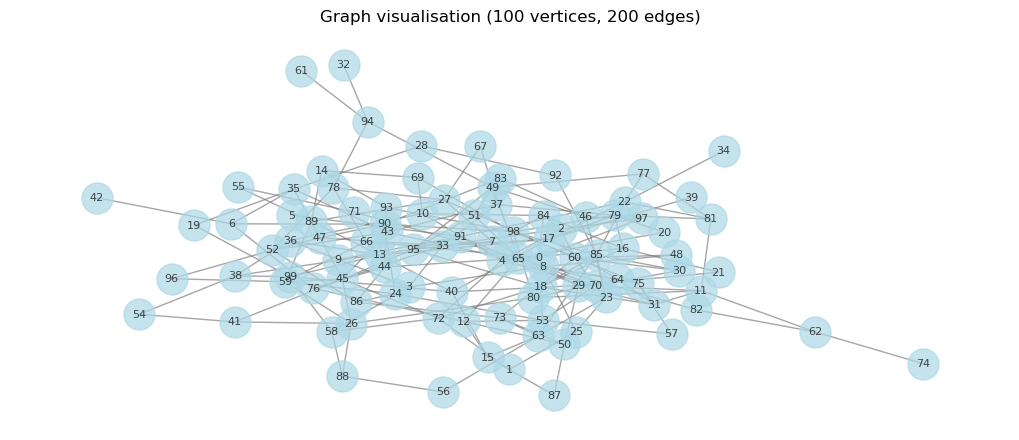

In [34]:
G = nx.Graph()
for vertex, neighbors in adj_list.items():
    for neighbor in neighbors:
        if vertex < neighbor: 
            G.add_edge(vertex, neighbor)

plt.figure(figsize=(10, 4))
nx.draw(G, 
        with_labels=True, 
        node_color='lightblue',
        alpha=0.7,
        node_size=500, 
        font_size=8, 
        edge_color='gray',
        pos=nx.spring_layout(G, seed=42)) 
plt.title("Graph visualisation (100 vertices, 200 edges)")
plt.show()


## The realisation of DFS and BFS

In [37]:
print("\nСonnected components (DFS):")
components = list(nx.connected_components(G))
print(f"The number of components: {len(components)}")
for i, comp in enumerate(components):
    print(f"Component {i+1}: {len(comp)} verticies")
print("\nThe Shortest path  (BFS):")

largest_component = max(components, key=len)
if len(largest_component) >= 2:
    test_vertices = random.sample(list(largest_component), min(5, len(largest_component)))
        
    for i in range(len(test_vertices)-1):
        start, target = test_vertices[i], test_vertices[i+1]
        try:

            shortest_path = nx.shortest_path(G, source=start, target=target)
            path_length = nx.shortest_path_length(G, source=start, target=target)
                
            print(f"Path {start} -> {target}: length = {path_length}")
            print(f"Route: {' --> '.join(map(str, shortest_path[:8]))}{'...' if len(shortest_path) > 8 else ''}")
        except nx.NetworkXNoPath:
            print(f"The path{start} -> {target}: doesn't exist")


Сonnected components (DFS):
The number of components: 1
Component 1: 99 verticies

The Shortest path  (BFS):
Path 32 -> 98: length = 5
Route: 32 --> 94 --> 49 --> 37 --> 79 --> 98
Path 98 -> 76: length = 3
Route: 98 --> 90 --> 6 --> 76
Path 76 -> 74: length = 5
Route: 76 --> 12 --> 65 --> 82 --> 62 --> 74
Path 74 -> 44: length = 4
Route: 74 --> 62 --> 82 --> 65 --> 44


### Results
#### The analisys of DFS and BFS
DFS for connectivity components:
* Uses a stack for depth-first traversal
* Visits all the neighbors of the current vertex before returning
* Finds all vertices reachable from the starting vertex
* Time complexity: O(V + E)
* A fully connected graph - all 99 vertices are reachable from any other vertex
* No isolated vertices or small components
* High connectivity level for a graph with 100 vertices and 200 edges 

BFS for shortest paths:
* Uses a queue for breadth-first traversal
* Visits peaks by levels of distance from the start
* Guaranteed to find the shortest path in an unweighted graph
* Time complexity: O(V + E)
* Path length: 3, 4, 5 edges
* Average length: (5 + 3 + 5 + 4) / 4 = 4.25 the edges
* Graph diameter: ≥ 5

#### Data Structures
Adjacency matrix
* Ease of implementation
* Quick access to the presence of an edge between vertices
* Memory consumption: O(V2)
  
Adjacency list
* Memory savings for sparse graphs: O(V+ E)
* A quick search of the vertex's neighbors

DFS:
* Stack (implemented via list)
* A set for tracking visited vertices
* A list for storing the current component

BFS:
* Queue
* The set of visited peaks
* A list/tuple for storing a path and its length

#### Design tecniques
* Modularity and separation of responsibilities between functions of different purposes
* Graph traversal
* Iterative approach
